# Projeto Python Bolsa de valores

In [138]:
# Importação de dados da tabela 
import pandas as pd              # Importa a biblioteca pandas, que é usada para manipulação e análise de dados.
import quantstats as qs          # Importa a biblioteca quantstats, que é usada para análise de desempenho de investimentos.

# Leitura do arquivo CSV contendo dados das empresas
daddos_empresas = (pd.read_csv("dados_empresas.csv"))  # Lê os dados do arquivo 'dados_empresas.csv' e armazena em um DataFrame pandas chamado 'daddos_empresas'.

# Exibe os dados do DataFrame para visualização
display(daddos_empresas)         # Mostra o DataFrame 'daddos_empresas' na tela para visualização.



,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic
0,2016-12-31,AALR3,14.45,5375545.0,0.087853,0.058904
1,2017-01-31,AALR3,13.75,3116406.0,0.051572,0.058904
2,2017-02-28,AALR3,12.56,3077805.0,0.055183,0.058904
3,2017-03-31,AALR3,15.41,3141709.0,0.047811,0.055171
4,2017-04-30,AALR3,18.32,6444929.0,0.041178,0.055171
...,...,...,...,...,...,...
50251,2024-02-29,ZAMP3,4.17,1904103.0,0.049875,0.027474
50252,2024-03-31,ZAMP3,3.39,3412842.0,0.061509,0.032287
50253,2024-04-30,ZAMP3,3.86,3093860.0,0.056943,0.032287
50254,2024-05-31,ZAMP3,3.15,1874658.0,0.064136,0.032287


In [139]:
# Cálculo dos retornos das empresas

# Calcula o retorno percentual diário para cada empresa no DataFrame 'daddos_empresas'
# 'ticker' é a coluna usada para agrupar os dados por empresa
# 'preco_fechamento_ajustado' é a coluna que contém os preços de fechamento ajustados das ações
# 'pct_change()' calcula a variação percentual entre os preços de fechamento ajustados consecutivos
daddos_empresas["retorno"] = daddos_empresas.groupby("ticker")["preco_fechamento_ajustado"].pct_change() 

# Exibe os dados do DataFrame com a nova coluna 'retorno' para visualização
display(daddos_empresas)         


,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno
0,2016-12-31,AALR3,14.45,5375545.0,0.087853,0.058904,NaN
1,2017-01-31,AALR3,13.75,3116406.0,0.051572,0.058904,-0.048443
2,2017-02-28,AALR3,12.56,3077805.0,0.055183,0.058904,-0.086545
3,2017-03-31,AALR3,15.41,3141709.0,0.047811,0.055171,0.226911
4,2017-04-30,AALR3,18.32,6444929.0,0.041178,0.055171,0.188838
...,...,...,...,...,...,...,...
50251,2024-02-29,ZAMP3,4.17,1904103.0,0.049875,0.027474,-0.162651
50252,2024-03-31,ZAMP3,3.39,3412842.0,0.061509,0.032287,-0.187050
50253,2024-04-30,ZAMP3,3.86,3093860.0,0.056943,0.032287,0.138643
50254,2024-05-31,ZAMP3,3.15,1874658.0,0.064136,0.032287,-0.183938


In [140]:
# Calcula os retornos das empresas

# Calcula a variação percentual (retorno) dos preços de fechamento ajustados para cada empresa
daddos_empresas['retorno'] = daddos_empresas.groupby('ticker')['preco_fechamento_ajustado'].pct_change()

# Desloca os valores da coluna 'retorno' uma posição para cima dentro de cada grupo de empresas (identificado pelo 'ticker')
# Isso significa que o retorno calculado para um dia será agora associado ao dia anterior
daddos_empresas['retorno'] = daddos_empresas.groupby('ticker')['retorno'].shift(-1)


In [141]:
# Filtrar liquidez

# Filtra o DataFrame 'daddos_empresas' para incluir apenas as linhas onde o volume negociado é maior que 1.000.000
# 'volume_negociado' é a coluna que contém o volume de negociação das ações
# A condição 'daddos_empresas["volume_negociado"] > 1000000' retorna um DataFrame com apenas as linhas que satisfazem essa condição
daddos_empresas = daddos_empresas[daddos_empresas["volume_negociado"] > 1000000]

# Exibe o DataFrame filtrado para visualização
daddos_empresas


,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno
0,2016-12-31,AALR3,14.45,5375545.0,0.087853,0.058904,-0.048443
1,2017-01-31,AALR3,13.75,3116406.0,0.051572,0.058904,-0.086545
2,2017-02-28,AALR3,12.56,3077805.0,0.055183,0.058904,0.226911
3,2017-03-31,AALR3,15.41,3141709.0,0.047811,0.055171,0.188838
4,2017-04-30,AALR3,18.32,6444929.0,0.041178,0.055171,-0.045306
...,...,...,...,...,...,...,...
50251,2024-02-29,ZAMP3,4.17,1904103.0,0.049875,0.027474,-0.187050
50252,2024-03-31,ZAMP3,3.39,3412842.0,0.061509,0.032287,0.138643
50253,2024-04-30,ZAMP3,3.86,3093860.0,0.056943,0.032287,-0.183938
50254,2024-05-31,ZAMP3,3.15,1874658.0,0.064136,0.032287,0.187302


In [142]:
# Criar ranking dos indicadores

# Cria um ranking do indicador 'ebit_ev' para cada data, em ordem decrescente
# A coluna 'ebit_ev' representa o indicador de lucro operacional dividido pelo valor da empresa
# A função 'rank' atribui um ranking baseado nos valores dentro de cada grupo de data
daddos_empresas['ranking_ev_ebit'] = daddos_empresas.groupby('data')['ebit_ev'].rank(ascending=False)

# Cria um ranking do indicador 'roic' para cada data, em ordem decrescente
# A coluna 'roic' representa o Retorno Sobre o Capital Investido
# A função 'rank' atribui um ranking baseado nos valores dentro de cada grupo de data
daddos_empresas['ranking_roic'] = daddos_empresas.groupby('data')['roic'].rank(ascending=False)

# Calcula o ranking final somando os rankings de 'ebit_ev' e 'roic'
# Isso dá um valor combinado que representa a posição da empresa em ambos os indicadores
daddos_empresas['ranking_final'] = daddos_empresas['ranking_ev_ebit'] + daddos_empresas['ranking_roic']

# Cria um ranking final dentro de cada grupo de data baseado na soma dos rankings anteriores
# A função 'rank' aqui é usada para dar um ranking final combinado dentro de cada grupo de data
daddos_empresas['ranking_final'] = daddos_empresas.groupby('data')['ranking_final'].rank()

# Exibe o DataFrame com os rankings para visualização
daddos_empresas


,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
0,2016-12-31,AALR3,14.45,5375545.0,0.087853,0.058904,-0.048443,37.0,60.0,48.0
1,2017-01-31,AALR3,13.75,3116406.0,0.051572,0.058904,-0.086545,70.0,62.0,74.0
2,2017-02-28,AALR3,12.56,3077805.0,0.055183,0.058904,0.226911,71.0,66.0,76.0
3,2017-03-31,AALR3,15.41,3141709.0,0.047811,0.055171,0.188838,79.0,77.0,81.0
4,2017-04-30,AALR3,18.32,6444929.0,0.041178,0.055171,-0.045306,84.0,75.0,84.5
...,...,...,...,...,...,...,...,...,...,...
50251,2024-02-29,ZAMP3,4.17,1904103.0,0.049875,0.027474,-0.187050,162.0,172.0,173.0
50252,2024-03-31,ZAMP3,3.39,3412842.0,0.061509,0.032287,0.138643,160.0,177.0,174.5
50253,2024-04-30,ZAMP3,3.86,3093860.0,0.056943,0.032287,-0.183938,154.0,169.0,166.0
50254,2024-05-31,ZAMP3,3.15,1874658.0,0.064136,0.032287,0.187302,158.0,180.0,176.0


In [143]:
# Calcula o ranking final somando o ranking de 'ebit_ev' e o ranking invertido de 'roic'
# 'ranking_ev_ebit' já foi calculado previamente e representa o ranking do indicador 'ebit_ev' em ordem decrescente
# 'roic' é ranqueado novamente em ordem decrescente e depois somado ao 'ranking_ev_ebit'
# O resultado é armazenado na coluna 'ranking_final'
daddos_empresas["ranking_final"] = daddos_empresas["ranking_ev_ebit"] + daddos_empresas["ranking_roic"].rank(ascending=False) 

 


In [144]:
# Recalcula o ranking final dentro de cada grupo de data
# Agrupa os dados por 'data' e calcula o ranking de 'ranking_final' dentro de cada grupo
# A função 'rank()' é utilizada para dar um ranking final dentro de cada grupo de data
daddos_empresas["ranking_final"] = daddos_empresas.groupby("data")["ranking_final"].rank()

# Exibe o DataFrame atualizado com o novo ranking final para visualização
daddos_empresas


,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
0,2016-12-31,AALR3,14.45,5375545.0,0.087853,0.058904,-0.048443,37.0,60.0,47.0
1,2017-01-31,AALR3,13.75,3116406.0,0.051572,0.058904,-0.086545,70.0,62.0,58.0
2,2017-02-28,AALR3,12.56,3077805.0,0.055183,0.058904,0.226911,71.0,66.0,57.0
3,2017-03-31,AALR3,15.41,3141709.0,0.047811,0.055171,0.188838,79.0,77.0,51.0
4,2017-04-30,AALR3,18.32,6444929.0,0.041178,0.055171,-0.045306,84.0,75.0,49.0
...,...,...,...,...,...,...,...,...,...,...
50251,2024-02-29,ZAMP3,4.17,1904103.0,0.049875,0.027474,-0.187050,162.0,172.0,30.0
50252,2024-03-31,ZAMP3,3.39,3412842.0,0.061509,0.032287,0.138643,160.0,177.0,33.0
50253,2024-04-30,ZAMP3,3.86,3093860.0,0.056943,0.032287,-0.183938,154.0,169.0,30.0
50254,2024-05-31,ZAMP3,3.15,1874658.0,0.064136,0.032287,0.187302,158.0,180.0,24.0


In [145]:
# Criando as carteiras

# Filtra o DataFrame 'daddos_empresas' para incluir apenas as empresas com ranking final menor ou igual a 10
# A condição 'daddos_empresas["ranking_final"] <= 10' retorna um DataFrame com apenas as linhas que satisfazem essa condição
daddos_empresas = daddos_empresas[daddos_empresas["ranking_final"] <= 10]

# Exibe o DataFrame filtrado para visualização
daddos_empresas


,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
544,2014-12-31,AGRO3,4.52,1276769.0,-0.041525,-0.014795,-0.066372,112.0,109.0,10.0
1083,2024-02-29,ALPA4,10.17,34337105.0,-0.257630,-0.339839,-0.062930,193.0,200.0,2.0
1084,2024-03-31,ALPA4,9.53,26909499.0,-0.274244,-0.339839,-0.007345,200.0,203.0,6.0
1085,2024-04-30,ALPA4,9.46,28469905.0,-0.280828,-0.339839,0.022199,189.0,195.0,4.0
1086,2024-05-31,ALPA4,9.67,28221526.0,-0.243474,-0.290749,-0.056877,197.0,202.0,2.0
...,...,...,...,...,...,...,...,...,...,...
49684,2022-04-30,WEST3,2.59,8025182.0,-1.178929,-0.123970,0.042471,225.0,217.0,10.0
49685,2022-05-31,WEST3,2.70,1837937.0,-0.469944,-0.109068,-0.233333,210.0,208.0,7.0
49686,2022-06-30,WEST3,2.07,1044856.0,-1.266676,-0.109068,0.077295,219.0,216.0,5.0
49698,2023-06-30,WEST3,1.90,5224128.0,-0.933362,-0.238193,-0.273684,216.0,212.0,9.0


In [146]:
# Calculando a rentabilidade por carteira

# Agrupa o DataFrame 'daddos_empresas' pela coluna 'data' e calcula a média dos retornos para cada data
# 'data' representa os diferentes períodos de tempo
# 'retorno' é a coluna que contém os retornos das empresas
# A função 'mean()' calcula a média dos retornos dentro de cada grupo de data
rentabilidade_carteiras = daddos_empresas.groupby("data")["retorno"].mean()

# Exibe a rentabilidade média por carteira para cada data
rentabilidade_carteiras


data
2012-12-31    0.018014
2013-01-31   -0.072680
2013-02-28   -0.096600
2013-03-31   -0.047166
2013-04-30   -0.064557
                ...   
2024-02-29   -0.053589
2024-03-31   -0.090644
2024-04-30   -0.112069
2024-05-31   -0.072085
2024-06-30         NaN
Name: retorno, Length: 139, dtype: float64

In [147]:
# Converte a série 'rentabilidade_carteiras' em um DataFrame
# A série contém a rentabilidade média por data e 'to_frame()' converte essa série em um DataFrame
rentabilidade_carteiras = rentabilidade_carteiras.to_frame()

# Exibe o DataFrame 'rentabilidade_carteiras' para visualização
display(rentabilidade_carteiras)


,retorno
data,
2012-12-31,0.018014
2013-01-31,-0.072680
2013-02-28,-0.096600
2013-03-31,-0.047166
2013-04-30,-0.064557
...,...
2024-02-29,-0.053589
2024-03-31,-0.090644
2024-04-30,-0.112069


In [148]:
# Calcular a rentabilidade do modelo

# Calcula a rentabilidade acumulada do modelo 'Magic Formula'
# 'retorno' deve ser uma coluna que já existe no DataFrame, contendo os retornos diários
# (1 + rentabilidade_carteiras["retorno"]) ajusta os retornos para calcular a rentabilidade acumulada
# 'cumprod()' calcula o produto cumulativo dos retornos ajustados, representando o crescimento acumulado
# Subtrai 1 para ajustar o resultado final da rentabilidade acumulada
rentabilidade_carteiras["Magic Formula"] = (1 + rentabilidade_carteiras["retorno"]).cumprod() - 1

# Desloca o DataFrame para baixo em uma linha
# Isso é feito para alinhar os resultados de rentabilidade com os períodos anteriores, ajustando a data de referência
rentabilidade_carteiras = rentabilidade_carteiras.shift(1)

# Remove linhas com valores ausentes (NaN)
# Após o deslocamento, a primeira linha será NaN, então ela é removida para limpar os dados
rentabilidade_carteiras = rentabilidade_carteiras.dropna()

# Exibe o DataFrame com a rentabilidade acumulada do modelo 'Magic Formula' para visualização
rentabilidade_carteiras


,retorno,Magic Formula
data,,
2013-01-31,0.018014,0.018014
2013-02-28,-0.072680,-0.055975
2013-03-31,-0.096600,-0.147168
2013-04-30,-0.047166,-0.187393
2013-05-31,-0.064557,-0.239853
...,...,...
2024-02-29,0.038697,-0.892510
2024-03-31,-0.053589,-0.898270
2024-04-30,-0.090644,-0.907491


In [149]:
# Carrega os dados do índice IBOVESPA de um arquivo CSV
# 'ibov.csv' é o nome do arquivo que contém os dados do índice
ibov = pd.read_csv("ibov.csv")

# Exibe o DataFrame 'ibov' para visualização dos dados carregados
ibov


,data,fechamento
0,2012-12-31,60952.08
1,2013-01-31,59761.49
2,2013-02-28,57424.29
3,2013-03-31,56352.09
4,2013-04-30,55910.37
...,...,...
134,2024-02-29,129020.02
135,2024-03-31,128106.10
136,2024-04-30,125924.19
137,2024-05-31,122098.09


In [150]:
# Calcula o retorno percentual diário do índice IBOVESPA
# 'pct_change()' calcula a variação percentual entre os preços de fechamento consecutivos
# 'dropna()' remove valores ausentes (NaN) que podem ser gerados pela função pct_change
retorno_ibov = ibov["fechamento"].pct_change().dropna()

# Calcula a rentabilidade acumulada do índice IBOVESPA
# (1 + retorno_ibov) ajusta os retornos para calcular a rentabilidade acumulada
# 'cumprod()' calcula o produto cumulativo dos retornos ajustados, representando o crescimento acumulado
# Subtrai 1 para ajustar o resultado final da rentabilidade acumulada
retorno_acumulado = (-1 + retorno_ibov.cumprod()) - 1

# Exibe a rentabilidade acumulada do IBOVESPA para visualização
retorno_acumulado


1     -2.019533
2     -1.999236
3     -2.000014
4     -2.000000
5     -2.000000
         ...   
134   -2.000000
135   -2.000000
136   -2.000000
137   -2.000000
138   -2.000000
Name: fechamento, Length: 138, dtype: float64

In [151]:
# Adiciona a rentabilidade acumulada do IBOVESPA ao DataFrame 'rentabilidade_carteiras'
# 'retorno_acumulado.values' contém os valores da rentabilidade acumulada do IBOVESPA
# 'rentabilidade_carteiras["ibovespa"]' cria uma nova coluna no DataFrame com esses valores
rentabilidade_carteiras["ibovespa"] = retorno_acumulado.values

# Remove a coluna 'retorno' do DataFrame 'rentabilidade_carteiras'
# 'drop('retorno', axis=1)' exclui a coluna 'retorno' (axis=1 indica que é uma coluna)
# Isso é feito para limpar o DataFrame, mantendo apenas as informações relevantes
rentabilidade_carteiras = rentabilidade_carteiras.drop('retorno', axis=1)

# Exibe o DataFrame 'rentabilidade_carteiras' atualizado para visualização
rentabilidade_carteiras


,Magic Formula,ibovespa
data,,
2013-01-31,0.018014,-2.019533
2013-02-28,-0.055975,-1.999236
2013-03-31,-0.147168,-2.000014
2013-04-30,-0.187393,-2.000000
2013-05-31,-0.239853,-2.000000
...,...,...
2024-02-29,-0.892510,-2.000000
2024-03-31,-0.898270,-2.000000
2024-04-30,-0.907491,-2.000000


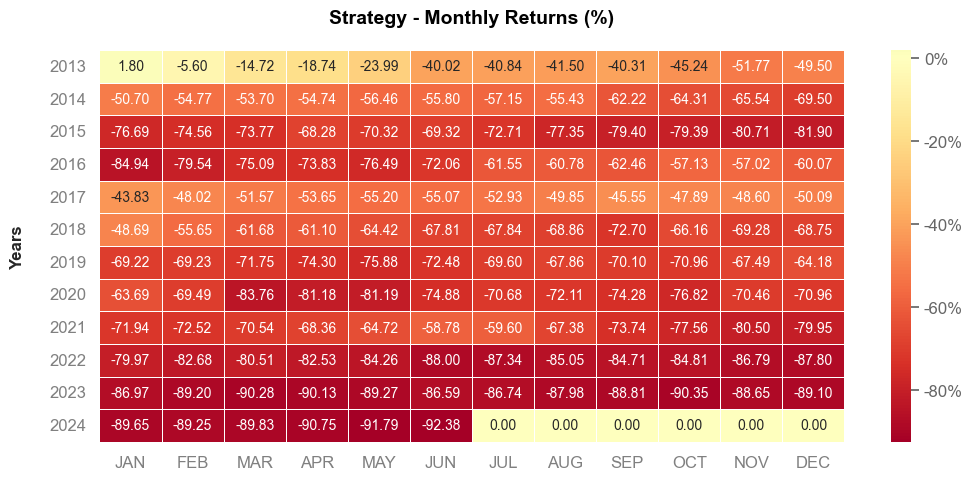

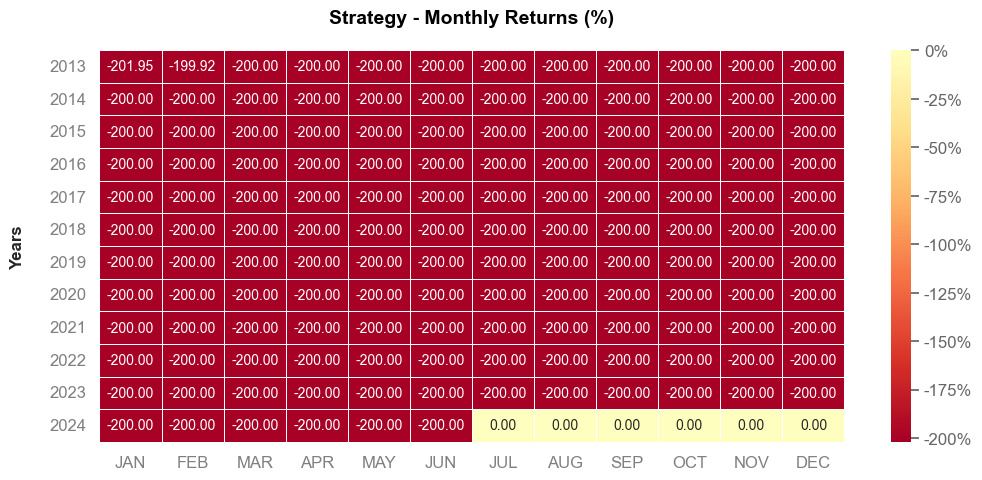

In [152]:
# Extende as funcionalidades do pandas com o QuantStats
# 'qs.extend_pandas()' adiciona métodos adicionais às funcionalidades do pandas DataFrame para análise financeira
qs.extend_pandas()

# Converte o índice do DataFrame 'rentabilidade_carteiras' para o tipo datetime
# 'pd.to_datetime()' é usado para garantir que o índice esteja no formato de data/hora, o que é necessário para algumas análises de séries temporais
rentabilidade_carteiras.index = pd.to_datetime(rentabilidade_carteiras.index)

# Plota um mapa de calor mensal da rentabilidade da carteira 'Magic Formula'
# 'plot_monthly_heatmap()' gera um gráfico de calor que mostra a rentabilidade mensal ao longo do tempo
rentabilidade_carteiras["Magic Formula"].plot_monthly_heatmap()

# Plota um mapa de calor mensal da rentabilidade do IBOVESPA
# 'plot_monthly_heatmap()' gera um gráfico de calor que mostra a rentabilidade mensal do IBOVESPA ao longo do tempo
rentabilidade_carteiras["ibovespa"].plot_monthly_heatmap()


<Axes: xlabel='data'>

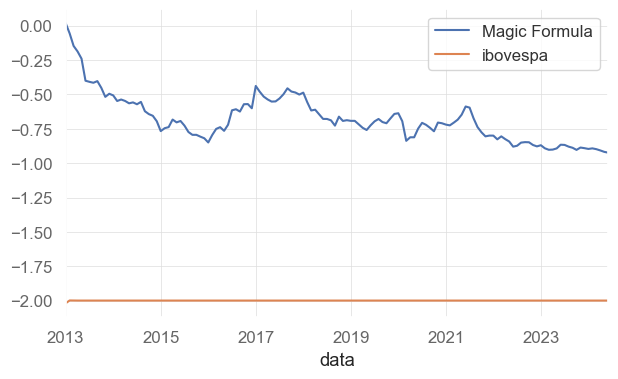

In [153]:
rentabilidade_carteiras.plot(figsize = (7, 4))